In [1]:
#import findspark
#findspark.init()
import pyspark

from pyspark.sql import SparkSession
from pyspark.sql import Row
import pyspark.sql.functions as func
import matplotlib.pyplot as plt


spark = SparkSession.builder \
    .master("local[2]") \
    .appName("COM6012 Assignment 1 Task1") \
    .getOrCreate()

sc = spark.sparkContext


In [2]:
logFile=spark.read.text("NASA_access_log_Jul95.gz").cache()

In [3]:
logFile.count()

1891715

In [4]:
reqs = logFile.withColumn('time', func.regexp_extract(logFile['value'],':(.*) -',1))

In [5]:
reqs_with_data = reqs.withColumn('Date', func.regexp_extract(func.col('value'),'\[(\d+)\/Jul',1))

In [6]:
df_first_slot = reqs_with_data.filter(func.col("time").between("00:00:00","03:59:59"))

In [7]:
avg_1=df_first_slot.groupBy('Date').count().select(func.mean('count')).collect()[0]

In [8]:
df_second_slot = reqs_with_data.filter(func.col("time").between("04:00:00","07:59:59"))

In [9]:
avg_2=df_second_slot.groupBy('Date').count().select(func.mean('count')).collect()[0]

In [10]:
df_third_slot = reqs_with_data.filter(func.col("time").between("08:00:00","11:59:59"))

In [11]:
avg_3=df_third_slot.groupBy('Date').count().select(func.mean('count')).collect()[0]

In [12]:
df_fourth_slot = reqs_with_data.filter(func.col("time").between("12:00:00","15:59:59"))

In [13]:
avg_4=df_fourth_slot.groupBy('Date').count().select(func.mean('count')).collect()[0]

In [14]:
df_fifth_slot = reqs_with_data.filter(func.col("time").between("16:00:00","19:59:59"))

In [15]:
avg_5=df_fifth_slot.groupBy('Date').count().select(func.mean('count')).collect()[0]

In [16]:
df_sixth_slot = reqs_with_data.filter(func.col("time").between("20:00:00","23:59:59"))

In [17]:
avg_6=df_fifth_slot.groupBy('Date').count().select(func.mean('count')).collect()[0]

In [18]:
rdd_report = sc.parallelize([('0 -- 4',avg_1),
                             ('4 -- 8',avg_2),
                             ('8 -- 12',avg_3),
                             ('12 -- 16',avg_4),
                             ('16 -- 20',avg_5),
                             ('20 -- 24',avg_6)])
df_report = rdd_report.toDF(["Six different Timeslot","Average number of request of Jul"])

In [19]:
df_report.show()

+----------------------+--------------------------------+
|Six different Timeslot|Average number of request of Jul|
+----------------------+--------------------------------+
|                0 -- 4|             [7079.714285714285]|
|                4 -- 8|             [5479.392857142857]|
|               8 -- 12|             [14462.32142857143]|
|              12 -- 16|            [17377.571428571428]|
|              16 -- 20|            [13580.333333333334]|
|              20 -- 24|            [13580.333333333334]|
+----------------------+--------------------------------+



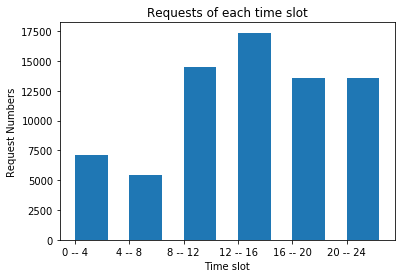

In [29]:
import numpy as np
df_pd = df_report.toPandas()


plt.bar(df_pd['Six different Timeslot'],df_pd['Average number of request of Jul'],align='edge',width =0.6)
plt.title("Requests of each time slot")
plt.xlabel("Time slot")
plt.ylabel("Request Numbers")
plt.savefig('Q1A_FIG1')

In [30]:
reqs_file = logFile.withColumn('File_Name', func.regexp_extract(logFile['value'],'(?s:.*)\/(.*) HTTP',1))

In [31]:
reqs_file.select('File_Name').show(5, False)

+----------------------+
|File_Name             |
+----------------------+
|                      |
|                      |
|mission-sts-73.html   |
|liftoff.html          |
|sts-73-patch-small.gif|
+----------------------+
only showing top 5 rows



In [32]:
df_new = reqs_file.filter(reqs_file['File_Name'].contains(".html"))

In [33]:
reqs_df_count=df_new.groupBy('File_Name').count().sort('count', ascending=False)

In [34]:
reqs_df_count = reqs_df_count.limit(20)

In [35]:
reqs_df_count.show(20,False)

+-------------------+-----+
|File_Name          |count|
+-------------------+-----+
|ksc.html           |40077|
|missions.html      |24881|
|images.html        |24490|
|liftoff.html       |21983|
|mission-sts-71.html|16706|
|mission-sts-70.html|16106|
|apollo.html        |14500|
|apollo-13.html     |14330|
|movies.html        |12525|
|history.html       |11859|
|countdown.html     |8566 |
|stsref-toc.html    |7509 |
|winvn.html         |6982 |
|mission-sts-69.html|6957 |
|apollo-13-info.html|5791 |
|lc39a.html         |5258 |
|apollo-11.html     |4996 |
|tour.html          |4318 |
|fr.html            |4212 |
|atlantis.html      |3637 |
+-------------------+-----+



In [36]:
df_reqs= reqs_df_count.toPandas()

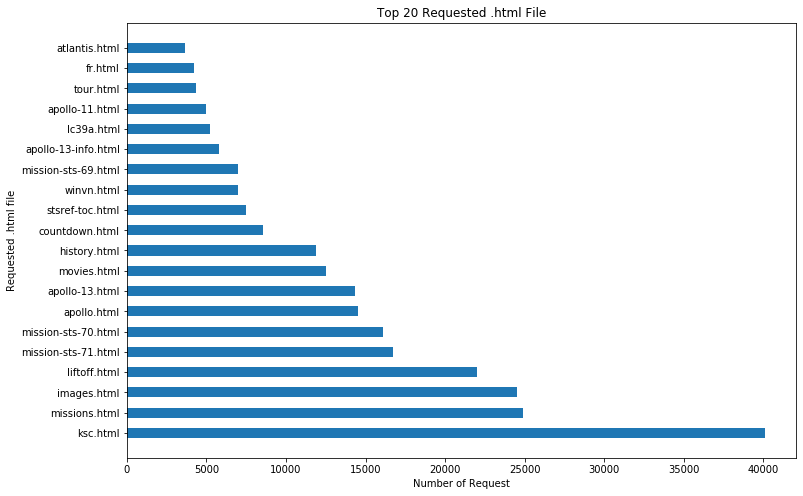

In [41]:
plt.figure(figsize=(12,8))
plt.barh(df_reqs['File_Name'],height =0.5,width = df_reqs['count'])
plt.title("Top 20 Requested .html File")
plt.xlabel("Number of Request")
plt.ylabel("Requested .html file")
plt.savefig('Q1C_FIG1')